## GridSearch

In [69]:
# import package
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# input data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2, random_state=12345)
dt_clf = DecisionTreeClassifier()

# hyperparameter
parameters = {'max_depth': range(1,5), 'min_samples_split': range(2,5)}

In [70]:
grid_dt = GridSearchCV(dt_clf,param_grid=parameters,cv=3,refit=True,return_train_score=True)
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 5),
                         'min_samples_split': range(2, 5)},
             return_train_score=True)

In [71]:
score_df = pd.DataFrame(grid_dt.cv_results_,columns=['params','mean_test_score','rank_test_score'])

In [72]:
score_df.sort_values('mean_test_score',ascending=False)

,params,mean_test_score,rank_test_score
6,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1
7,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1
8,"{'max_depth': 3, 'min_samples_split': 4}",0.966667,1
9,"{'max_depth': 4, 'min_samples_split': 2}",0.966667,1
10,"{'max_depth': 4, 'min_samples_split': 3}",0.966667,1
11,"{'max_depth': 4, 'min_samples_split': 4}",0.966667,1
3,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,7
4,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,7
5,"{'max_depth': 2, 'min_samples_split': 4}",0.958333,7
0,"{'max_depth': 1, 'min_samples_split': 2}",0.683333,10


In [73]:
print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.9666666666666667


---

## RandomSearch Cross Validation

In [74]:
from sklearn.model_selection import RandomizedSearchCV

random_dt = RandomizedSearchCV(estimator=dt_clf, param_distributions=parameters,n_iter=5,n_jobs=-1,cv=3,random_state=12345)
random_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(1, 5),
                                        'min_samples_split': range(2, 5)},
                   random_state=12345)

In [75]:
score_df = pd.DataFrame(random_dt.cv_results_)
score_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'min_samples_split': 4, 'max_depth': 3}",0.966667,1
1,"{'min_samples_split': 2, 'max_depth': 1}",0.683333,5
2,"{'min_samples_split': 2, 'max_depth': 2}",0.958333,4
3,"{'min_samples_split': 3, 'max_depth': 3}",0.966667,1
4,"{'min_samples_split': 4, 'max_depth': 4}",0.966667,1


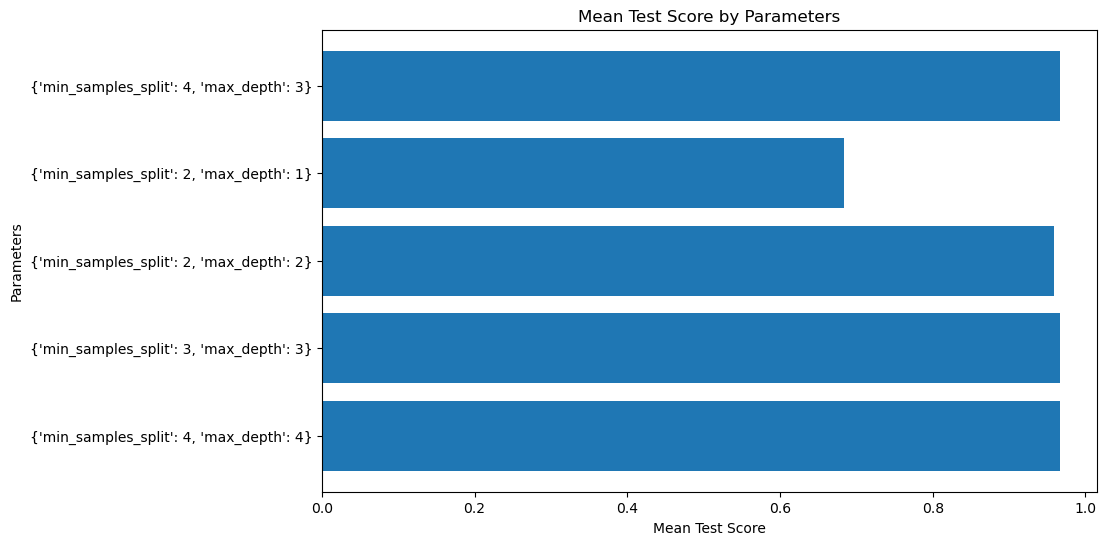

In [76]:
# 시각화
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 6))
plt.barh(score_df['params'].astype(str), score_df['mean_test_score'])
plt.xlabel('Mean Test Score')
plt.ylabel('Parameters')
plt.title('Mean Test Score by Parameters')
plt.gca().invert_yaxis()
plt.show()